In [108]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import numpy as np
import pandas as pd
import warnings
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [232]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
IBM = pd.read_csv('IBM.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
IBM.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,194.089996,196.350006,193.800003,196.350006,167.219650,4234100
2013-01-03,195.669998,196.289993,194.440002,195.270004,166.299850,3644700
2013-01-04,194.190002,194.460007,192.779999,193.990005,165.209763,3380200
2013-01-07,193.399994,193.779999,192.339996,193.139999,164.485886,2862300
2013-01-08,192.919998,193.300003,191.600006,192.869995,164.255936,3026900
2013-01-09,193.479996,193.490005,191.649994,192.320007,163.787521,3212000
2013-01-10,192.649994,192.960007,191.279999,192.880005,164.264465,3608100
2013-01-11,194.149994,195.000000,192.899994,194.449997,165.601532,3880400
2013-01-14,192.820007,193.279999,191.750000,192.619995,164.043015,4172200


In [233]:
series = (IBM['Close']-IBM['Open']).resample('D').mean()
series = series.fillna(series.bfill())
series1 = series['2017':]

In [234]:
series1.shape

(460,)

In [235]:
series_train = series[0:700]
series_test = series[700:250]
series_out = series[250:]

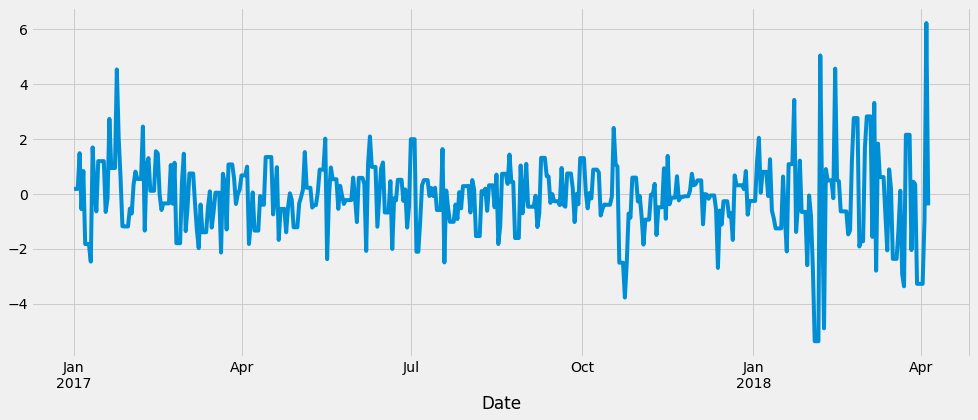

In [236]:
series1.plot(figsize=(15, 6))
plt.show()

In [237]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [248]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series1[0:250],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:692.5147549972886
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:677.4163413438366
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:694.4362716943101
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:689.801827749745
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:741.8974633136552
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:696.4276373776331
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:715.3334173312268
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:671.8284086119933
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:850.3317041830317
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:659.5271723084253
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:676.8046850206629
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:669.9608863700356
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:725.1816873841923
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:673.2911447135776
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:770.1515606951081
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:755.5236628950854
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:774.4246458044993
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:770.789424249416
ARIMA(0, 1, 

In [240]:
res = []
for i in range(200):
    mod = sm.tsa.statespace.SARIMAX(series1[i:100+i],
                                order=(0, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    pred = results.get_forecast(steps = 1)
    pred_mean = pred.predicted_mean
    res.append(pred_mean)

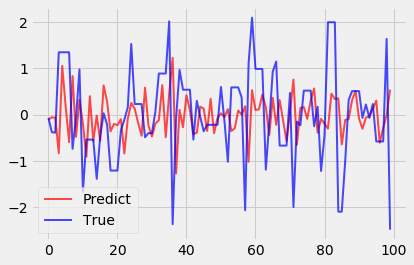

In [247]:
plt.plot(range(100),res[0:100], color = 'red', alpha = .7, lw=2)
plt.plot(range(100), series1[100:200], color = 'blue', alpha = .7, lw=2)
plt.legend(['Predict','True'])
plt.savefig('One_day_roll.png', dpi=200)

In [198]:
mod = sm.tsa.statespace.SARIMAX(series1[0:250],
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
pred = results.get_forecast(start=pd.to_datetime('2015-11-22'), dynamic=True, full_results=True)


print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2040      0.061      3.356      0.001       0.085       0.323
ma.S.L12      -1.0000    638.091     -0.002      0.999   -1251.635    1249.634
sigma2        10.2781   6558.643      0.002      0.999   -1.28e+04    1.29e+04


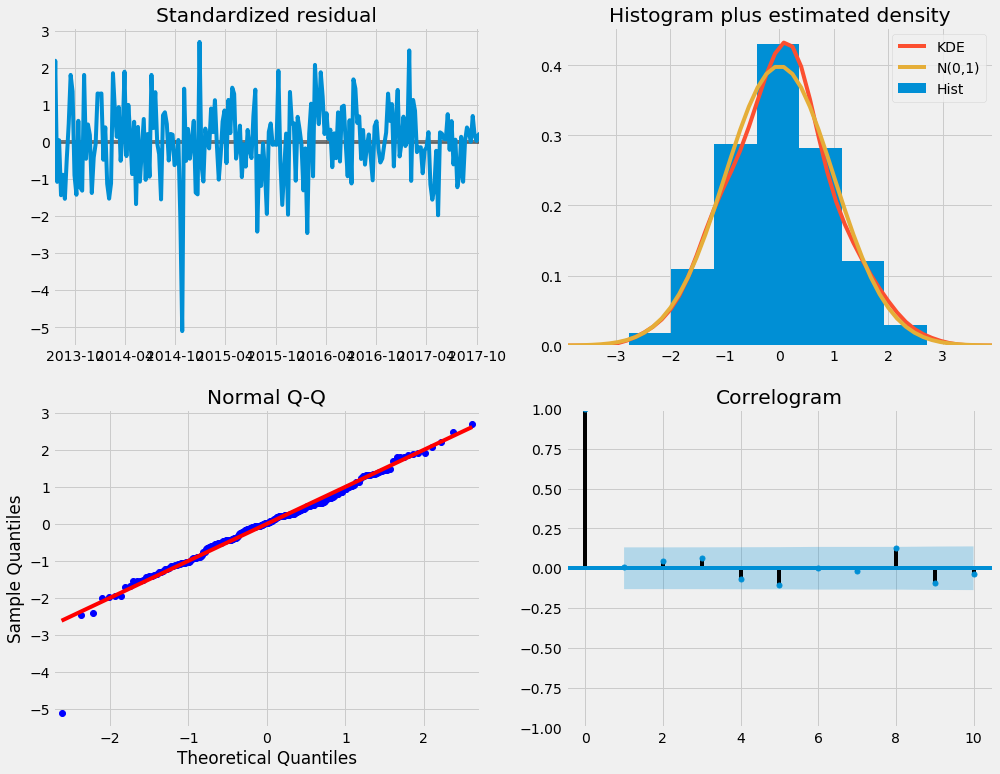

In [199]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [200]:
pred = results.get_prediction(start=pd.to_datetime('2015-11-22'), dynamic=True, full_results=True)
pred_ci = pred.conf_int()


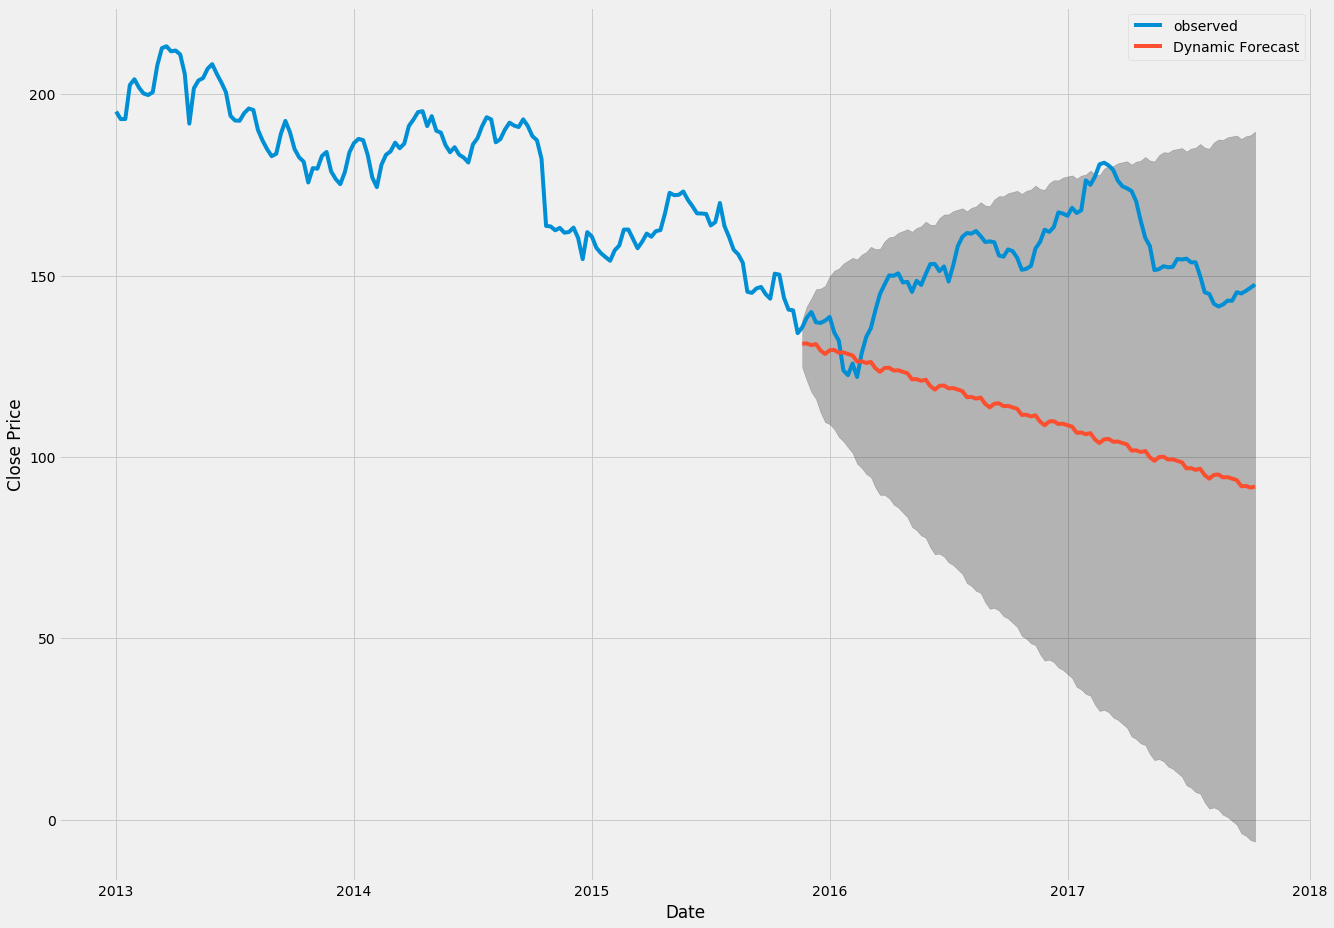

In [201]:
ax = series[0:250].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

#ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
#                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Close Price')

plt.legend()
plt.savefig('Close.png', dpi=200)

predicted=150.556390, expected=152.504001
predicted=152.112227, expected=148.358002
predicted=146.873686, expected=152.777500
predicted=153.661834, expected=158.089999
predicted=158.618800, expected=160.664002
predicted=160.712192, expected=161.717996
predicted=161.772000, expected=161.550000
predicted=160.415709, expected=162.273999
predicted=161.488575, expected=160.884000
predicted=160.021970, expected=159.252002
predicted=158.728330, expected=159.417999
predicted=159.313962, expected=159.170002
predicted=158.899685, expected=155.529999
predicted=154.903036, expected=155.187998
predicted=155.317312, expected=157.200000
predicted=157.343969, expected=156.740003
predicted=156.548349, expected=154.853998
predicted=154.778079, expected=151.580002
predicted=150.770257, expected=151.844003
predicted=151.675596, expected=152.645996
predicted=152.682117, expected=157.438000
predicted=158.494031, expected=159.272000
predicted=159.440803, expected=162.639999
predicted=162.929374, expected=162

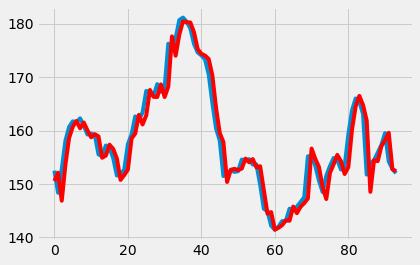

In [156]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]  
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()